In [1]:
from glob import glob
from PIL import Image
import tensorflow as tf
from src.dataset import *
from matplotlib import pyplot as plt

In [2]:
dataset = get_dataset(
    sorted(glob('../DIV2K_train_HR/*')),
    sorted(glob('../DIV2K_train_LR_bicubic/X4/*')),
    128, 16
)
dataset

<PrefetchDataset shapes: ((None, 256, 256, 3), (None, 64, 64, 3)), types: (tf.float32, tf.float32)>

In [3]:
x_batch, y_batch = next(iter(dataset))
x_batch = x_batch.numpy()
y_batch = y_batch.numpy()
x_batch.shape, y_batch.shape

((16, 256, 256, 3), (16, 64, 64, 3))

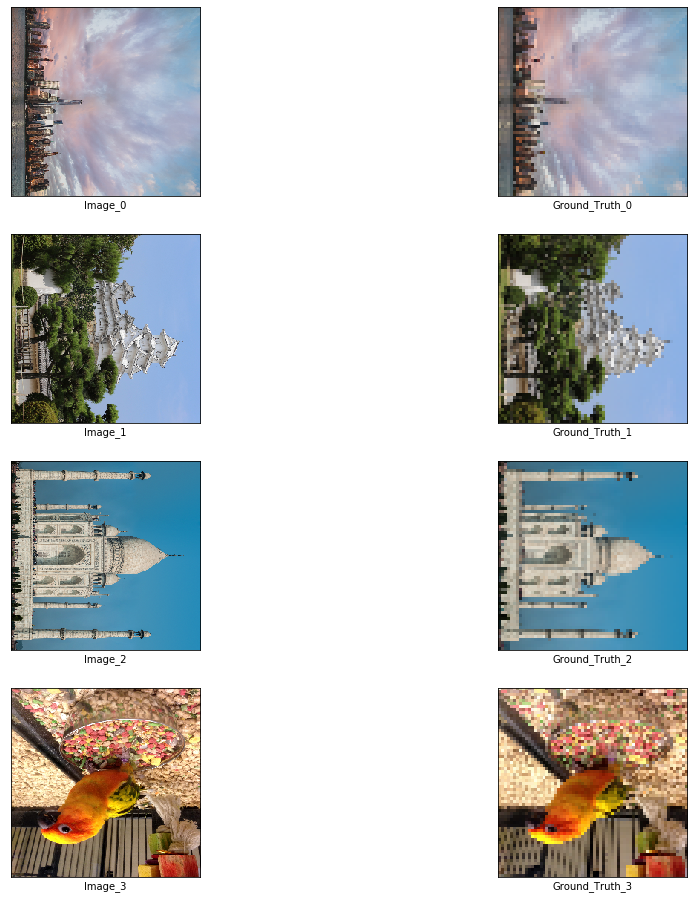

In [4]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (16, 16))
plt.setp(axes.flat, xticks = [], yticks = [])
c = 0
for i, ax in enumerate(axes.flat):
    if i % 2 == 0:
        ax.imshow(x_batch[c] / 255.0)
        ax.set_xlabel('Image_' + str(c))
    elif i % 2 == 1:
        ax.imshow(y_batch[c] / 255.0)
        ax.set_xlabel('Ground_Truth_' + str(c))
        c += 1
plt.show()